## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})\
.rename({'rating_count_tot': 'rating_count_total', 'user_rating': 'rating', 'track_name': 'app'}, axis=1)


In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay



for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

#google_play_store['Category'].replace('Music & Video', 'Music', inplace = True)
#google_play_store['Category'].replace(' ', 'Music', inplace = True) #saffssdafsdsfsdfsdfdsfdsfsdfsdfsfsd

google_play_store['Category'].replace('GAME', 'Games', inplace = True)
google_play_store['Category'].replace('PRODUCTIVITY', 'Productivity', inplace = True)
google_play_store['Category'].replace('WEATHER', 'Weather', inplace = True)
google_play_store['Category'].replace('SHOPPING', 'Shopping', inplace = True)
google_play_store['Category'].replace('FINANCE', 'Finance', inplace = True)
google_play_store['Category'].replace('TOOLS', 'Utilities', inplace = True)
google_play_store['Category'].replace('PERSONALIZATION', 'Utilities', inplace = True)
google_play_store['Category'].replace('TRAVEL_AND_LOCAL', 'Travel', inplace = True)
google_play_store['Category'].replace('SOCIAL', 'Social Networking', inplace = True)
google_play_store['Category'].replace('DATING', 'Social Networking', inplace = True)
google_play_store['Category'].replace('COMMUNICATION', 'Social Networking', inplace = True)
google_play_store['Category'].replace('SPORTS', 'Sports', inplace = True)
google_play_store['Category'].replace('BUSINESS', 'Business', inplace = True)
google_play_store['Category'].replace('HEALTH_AND_FITNESS', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('BEAUTY', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('ENTERTAINMENT', 'Entertainment', inplace = True)
google_play_store['Category'].replace('COMICS', 'Entertainment', inplace = True)
google_play_store['Category'].replace('VIDEO_PLAYERS', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('PHOTOGRAPHY', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('ART_AND_DESIGN', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('MAPS_AND_NAVIGATION', 'Navigation', inplace = True)
google_play_store['Category'].replace('EDUCATION', 'Education', inplace = True)
google_play_store['Category'].replace('PARENTING', 'Education', inplace = True)
google_play_store['Category'].replace('LIFESTYLE', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('EVENTS', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('HOUSE_AND_HOME', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('AUTO_AND_VEHICLES', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FAMILY', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FOOD_AND_DRINK', 'Food & Drink', inplace = True)
google_play_store['Category'].replace('NEWS_AND_MAGAZINES', 'News', inplace = True)
google_play_store['Category'].replace('MEDICAL', 'Medical', inplace = True)
google_play_store['Category'].replace('LIBRARIES_AND_DEMO', 'Catalogs', inplace = True)


apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
google_play_store['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)


In [4]:
# music apps for google play

for i in range(len(google_play_store['Genres'])):
    if google_play_store['Genres'].iloc[i] == 'Music':
        google_play_store['Category'].iloc[i] = 'Music'
    else:
        continue

#google_play_store['Category'] == 'Music'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
google_play_store["rating"] = google_play_store["rating"].fillna(google_play_store["rating"].median())
#replacing all NaN values with median of column 'rating'

In [6]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [7]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 80]

In [8]:
#apple_store[apple_store['price'] > 60 ] # uncomment and run to see all expensive apps

In [9]:
apple_store = apple_store[apple_store['price'] <= 80]

In [10]:
# top rated apps for google where amount of reviews is more than 300
google_play_top = google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


In [11]:
# top rated apps for google where amount of reviews is more than 300
apple_top = apple_store[(apple_store["rating_count_total"] > 300) & (apple_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


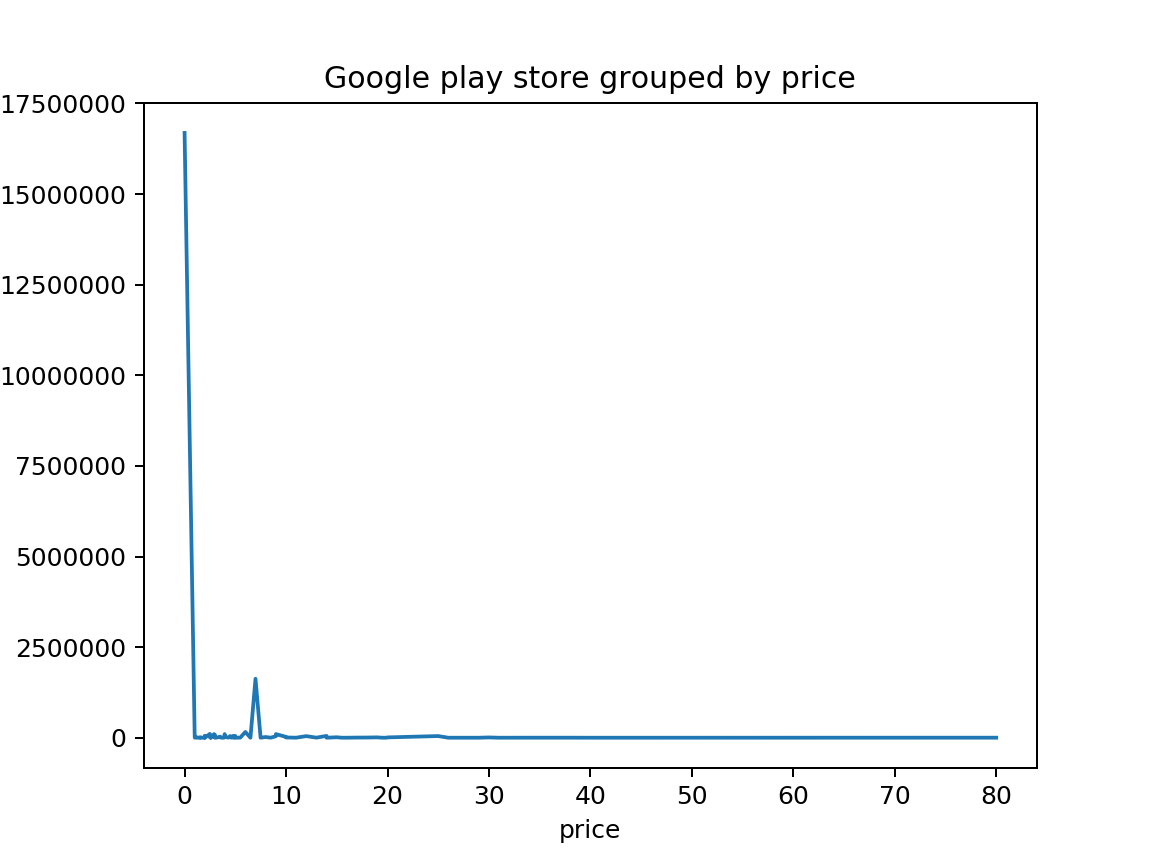

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [111]:
%matplotlib notebook

paid_apps_google = google_play_store[(google_play_store['price'] != 0.0)].fillna(0)
df1 = paid_apps_google.groupby("price").mean()

df2 = google_play_store[google_play_store['rating'].notna()].groupby("price").mean()
plt.title("Google play store grouped by price")
plt.ylabel('rating count')
plt.xlabel('price')

plt.ticklabel_format(style='plain')
plt.plot(df2.index, df2['installs'])

<IPython.core.display.Javascript object>


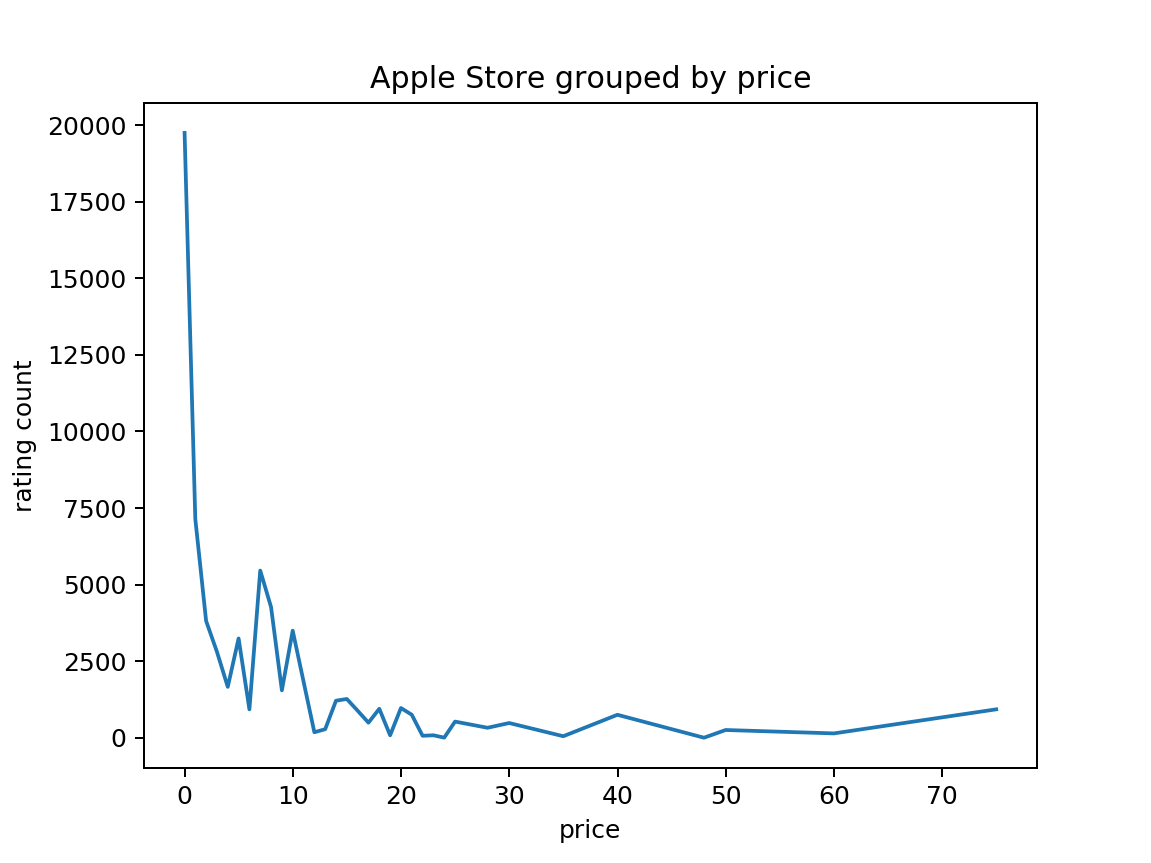

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [112]:
%matplotlib notebook

paid_apps_apple = apple_store[(apple_store['price'] != 0.0) & apple_store['rating'] > 0.0] 
df3 = paid_apps_apple.groupby("price").mean()


df4 = apple_store.groupby("price").mean()
plt.title("Apple Store grouped by price")
plt.xlabel('price')
plt.ylabel('rating count')

plt.ticklabel_format(style='plain')
plt.plot(df4.index, df4['rating_count_total'])

<IPython.core.display.Javascript object>


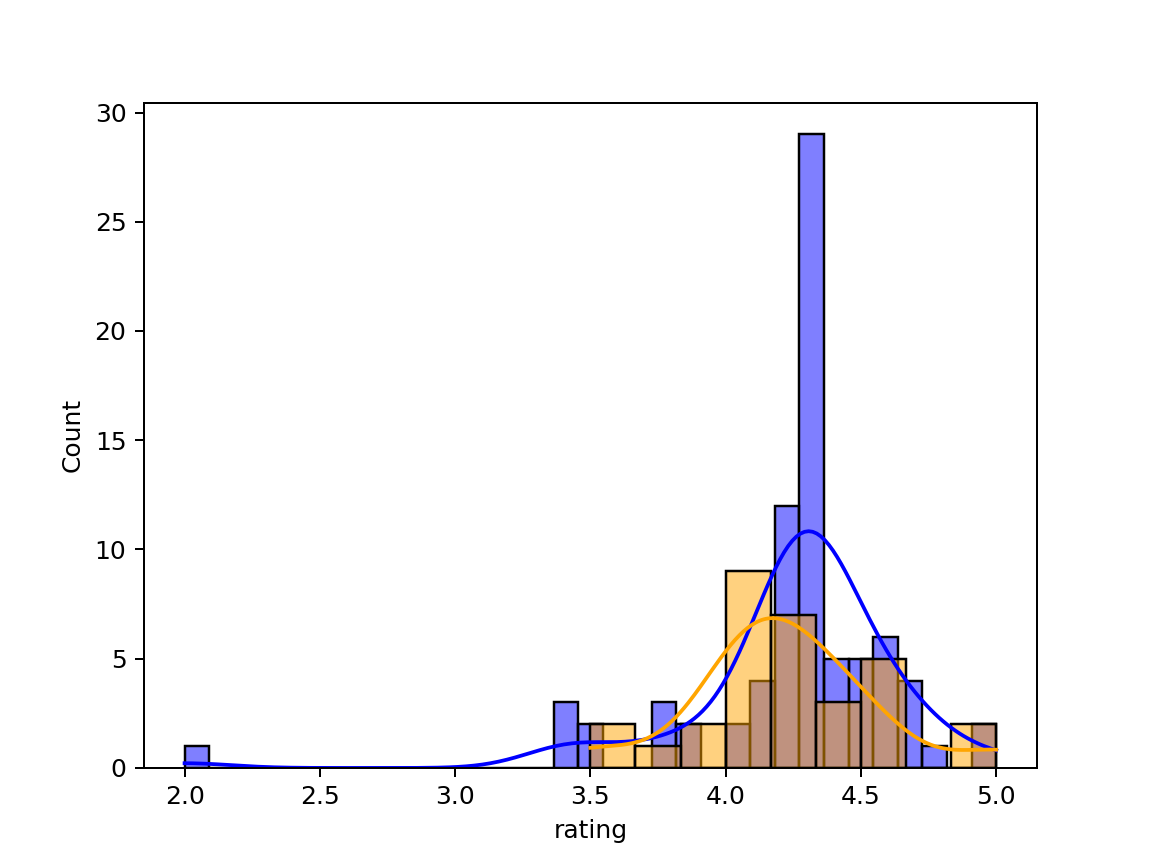

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

In [14]:
%matplotlib notebook

plt.ticklabel_format(style='plain')
sns.histplot(df1['rating'], kde=True, color='blue')
sns.histplot(df3['rating'], kde=True, color='orange')

In [15]:
apple_store[apple_store['rating']>5]

,app,size_bytes,currency,price,rating_count_total,rating_count_ver,rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


<IPython.core.display.Javascript object>


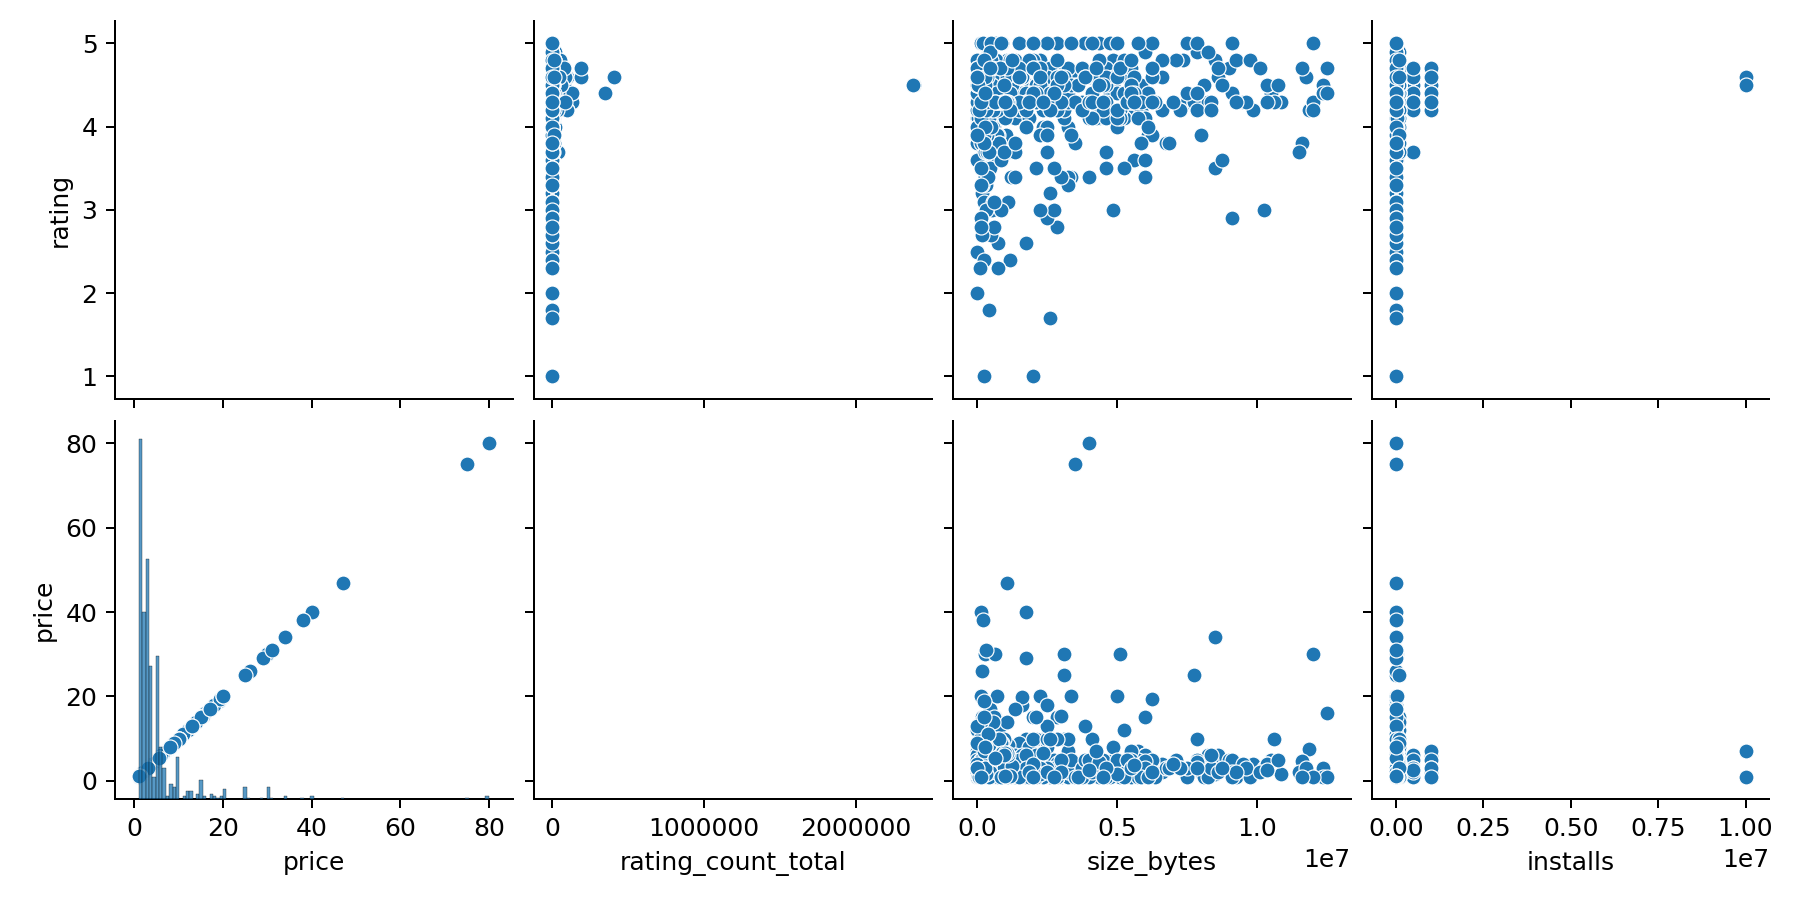

In [16]:
# some apps occure in table multiple times
google_play_store[google_play_store['app'] == 'Minecraft']
sns.pairplot(
    paid_apps_google,
    x_vars=['price', 'rating_count_total','size_bytes', 'installs'], # with 'price' it isn't working ¯\_(ツ)_/¯
    # and if change 'price' with for example  'rating_count_total' it'll give exception that price is not in index
    # also first chart isn't showing and i don't know why(if we just remove 'price')
    y_vars=["rating", 'price'],
)

In [31]:
#paid_apps_google
#paid_apps_apple
#apple_store.prime_genre.value_counts()
apple_games = apple_store[apple_store['prime_genre'] == 'Games']
apple_ent = apple_store[apple_store['prime_genre'] == 'Entertainment']
apple_edu = apple_store[apple_store['prime_genre'] == 'Education']
apple_pv = apple_store[apple_store['prime_genre'] == 'Photo & Video']
apple_ut = apple_store[apple_store['prime_genre'] == 'Utilities']
apple_hf = apple_store[apple_store['prime_genre'] == 'Health & Fitness']
apple_pr = apple_store[apple_store['prime_genre'] == 'Productivity']
apple_br = apple_store[apple_store['prime_genre'] == 'Books & Reference ']
apple_sn = apple_store[apple_store['prime_genre'] == 'Social Networking']
apple_life = apple_store[apple_store['prime_genre'] == 'Lifestyle']
apple_mu = apple_store[apple_store['prime_genre'] == 'Music']
apple_shop = apple_store[apple_store['prime_genre'] == 'Shopping']
apple_sport = apple_store[apple_store['prime_genre'] == 'Sports']
apple_fin = apple_store[apple_store['prime_genre'] == 'Finance']
apple_travel = apple_store[apple_store['prime_genre'] == 'Travel']
apple_news = apple_store[apple_store['prime_genre'] == 'News']
apple_weather = apple_store[apple_store['prime_genre'] == 'Weather']
apple_fd = apple_store[apple_store['prime_genre'] == 'Food & Drink']
apple_biz = apple_store[apple_store['prime_genre'] == 'Business']
apple_nav = apple_store[apple_store['prime_genre'] == 'Navigation']
apple_med = apple_store[apple_store['prime_genre'] == 'Medical']
apple_cat = apple_store[apple_store['prime_genre'] == 'Catalogs']

In [30]:
#paid_apps_apple.prime_genre.value_counts()
apple_paid_games = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Games']
apple_paid_edu = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Education']
apple_paid_ent = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Entertainment']
apple_paid_pv = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Photo & Video']
apple_paid_ut = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Utilities']
apple_paid_pr = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Productivity']
apple_paid_hf = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Health & Fitness']
apple_paid_br = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Books & Reference ']
apple_paid_mu = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Music']
apple_paid_life = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Lifestyle']
apple_paid_weather = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Weather']
apple_paid_biz = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Business']
apple_paid_sport = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Sports']
apple_paid_travel = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Travel']
apple_paid_nav = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Navigation']
apple_paid_sn = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Social Networking']
apple_paid_fd = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Food & Drink']
apple_paid_fin = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Finance']
apple_paid_med = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Medical']
apple_paid_news = paid_apps_apple[paid_apps_apple['prime_genre'] == 'News']
apple_paid_cat = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Catalogs']
apple_paid_shop = paid_apps_apple[paid_apps_apple['prime_genre'] == 'Shopping']

In [29]:
#google_play_store['Category'].value_counts()

google_games = google_play_store[google_play_store['Category'] == 'Games']
google_ent = google_play_store[google_play_store['Category'] == 'Entertainment']
google_edu = google_play_store[google_play_store['Category'] == 'Education']
google_pv = google_play_store[google_play_store['Category'] == 'Photo & Video']
google_ut = google_play_store[google_play_store['Category'] == 'Utilities']
google_hf = google_play_store[google_play_store['Category'] == 'Health & Fitness']
google_pr = google_play_store[google_play_store['Category'] == 'Productivity']
google_br = google_play_store[google_play_store['Category'] == 'Books & Reference ']
google_sn = google_play_store[google_play_store['Category'] == 'Social Networking']
google_life = google_play_store[google_play_store['Category'] == 'Lifestyle']
google_mu = google_play_store[google_play_store['Category'] == 'Music']
google_shop = google_play_store[google_play_store['Category'] == 'Shopping']
google_sport = google_play_store[google_play_store['Category'] == 'Sports']
google_fin = google_play_store[google_play_store['Category'] == 'Finance']
google_travel = google_play_store[google_play_store['Category'] == 'Travel']
google_news =google_play_store[google_play_store['Category'] == 'News']
google_weather = google_play_store[google_play_store['Category'] == 'Weather']
google_fd = google_play_store[google_play_store['Category'] == 'Food & Drink']
google_biz = google_play_store[google_play_store['Category'] == 'Business']
google_nav = google_play_store[google_play_store['Category'] == 'Navigation']
google_med = google_play_store[google_play_store['Category'] == 'Medical']
google_cat = google_play_store[google_play_store['Category'] == 'Catalogs']

In [28]:
#paid_apps_google['Category'].value_counts()

google_paid_games = paid_apps_google[paid_apps_google['Category'] == 'Games']
google_paid_ent = paid_apps_google[paid_apps_google['Category'] == 'Entertainment']
google_paid_edu = paid_apps_google[paid_apps_google['Category'] == 'Education']
google_paid_pv = paid_apps_google[paid_apps_google['Category'] == 'Photo & Video']
google_paid_ut = paid_apps_google[paid_apps_google['Category'] == 'Utilities']
google_paid_hf = paid_apps_google[paid_apps_google['Category'] == 'Health & Fitness']
google_paid_pr = paid_apps_google[paid_apps_google['Category'] == 'Productivity']
google_paid_br = paid_apps_google[paid_apps_google['Category'] == 'Books & Reference ']
google_paid_sn = paid_apps_google[paid_apps_google['Category'] == 'Social Networking']
google_paid_life = paid_apps_google[paid_apps_google['Category'] == 'Lifestyle']
google_paid_mu = paid_apps_google[paid_apps_google['Category'] == 'Music']
google_paid_shop = paid_apps_google[paid_apps_google['Category'] == 'Shopping']
google_paid_sport = paid_apps_google[paid_apps_google['Category'] == 'Sports']
google_paid_fin = paid_apps_google[paid_apps_google['Category'] == 'Finance']
google_paid_travel = paid_apps_google[paid_apps_google['Category'] == 'Travel']
google_paid_news = paid_apps_google[paid_apps_google['Category'] == 'News']
google_paid_weather = paid_apps_google[paid_apps_google['Category'] == 'Weather']
google_paid_fd = paid_apps_google[paid_apps_google['Category'] == 'Food & Drink']
google_paid_biz = paid_apps_google[paid_apps_google['Category'] == 'Business']
google_paid_nav = paid_apps_google[paid_apps_google['Category'] == 'Navigation']
google_paid_med = paid_apps_google[paid_apps_google['Category'] == 'Medical']
google_paid_cat = paid_apps_google[paid_apps_google['Category'] == 'Catalogs']

In [117]:
comp_apple  = apple_store.prime_genre.value_counts().to_frame(name = 'apple').sort_index()
comp_free_apple  = apple_store[apple_store['price'] == 0].prime_genre.value_counts().to_frame(name = 'free_apple').sort_index()
comp_paid_apple = paid_apps_apple.prime_genre.value_counts().to_frame(name =  'paid_apple').sort_index()
comp_google = google_play_store['Category'].value_counts().to_frame(name =  'google').sort_index()
#comp_free_google = google_play_store[google_play_store['Type'] == 'Free'].value_counts().to_frame(name =  'free_google').sort_index()
comp_paid_google = paid_apps_google['Category'].value_counts().to_frame(name =  'paid_google').sort_index()

comparison = comp_apple.join(comp_free_apple).join(comp_paid_apple).join(comp_google).join(comp_paid_google)
#.join(comp_f_google)

#.join(comp_free_apple)
#.join(comp_free_google)
#comparison.columns = ['Total Apple', 'Total Google','Paid Apple', 'Paid Google']

#comparison['Paid Apple%'] = comparison['Paid Apple'] * 100/comparison['Total Apple']
#comparison['Paid Google%'] = comparison['Paid Google']*100/comparison['Total Google']

#comparison = comparison[['Total Apple', 'Paid Apple', 'Paid Apple%', 'Total Google', 'Paid Google', 'Paid Google%']]
comparison

comp_free_google

,,,,,,,,,,,,,free_google
app,Category,rating,rating_count_total,size_bytes,installs,Type,price,Content Rating,Genres,Last Updated,ver,Android Ver,
"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.3,27,450000.0,500,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,1
+Download 4 Instagram Twitter,Social Networking,4.5,40467,2750000.0,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,1
- Free Comics - Comic Apps,Entertainment,3.5,115,1137500.0,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,1
.R,Utilities,4.5,259,203000.0,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,1
/u/app,Social Networking,4.7,573,6625000.0,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
감성학원 BL 첫사랑,Entertainment,4.4,190,4250000.0,10000,Free,0.0,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up,1
"뽕티비 - 개인방송, 인터넷방송, BJ방송",Photo & Video,4.3,414,7375000.0,100000,Free,0.0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up,1
"💘 WhatsLov: Smileys of love, stickers and GIF",Social Networking,4.6,22098,2250000.0,1000000,Free,0.0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,1


In [ ]:
ap_tot = comparison['Total Apple'].sort_index()
go_tot = comparison['Total Google'].sort_index()
ap_paid = comparison['Paid Apple'].sort_index()
go_paid = comparison['Paid Google'].sort_index()
df_comparison = comparison[['Paid Apple%','Paid Google%']]